<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> Feature Hashing </font> </center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('Países.csv')
df.head()

,Países
0,MEX
1,CHN
2,CAN
3,POL
4,CPV


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Países  560 non-null    object
dtypes: object(1)
memory usage: 4.5+ KB


In [3]:
len(df)

560

In [6]:
df['Países'].nunique(), df['Países'].unique()

(91,
 array(['MEX', 'CHN', 'CAN', 'POL', 'CPV', 'PHL', 'EGY', 'FIN', 'ITA',
        'AUS', 'CZE', 'BLZ', 'FRA', 'RUS', 'MAR', 'ESP', 'CIV', 'AND',
        'SOM', 'CHE', 'AUT', 'BHS', 'JPN', 'PRT', 'KOR', 'COL', 'USA',
        'NLD', 'HRV', 'SWE', 'DEU', 'BEN', 'BTN', 'SEN', 'ECU', 'LCA',
        'BEL', 'NOR', 'GRC', 'TCD', 'KEN', 'IRN', 'CYP', 'ZAF', 'DNK',
        'TGO', 'PAK', 'SVK', 'LSO', 'RWA', 'ARE', 'GRD', 'MDV', 'PNG',
        'MHL', 'SVN', 'SLV', 'OMN', 'TUV', 'GNB', 'PER', 'SDN', 'GEO',
        'ALB', 'BOL', 'GMB', 'CUB', 'GIN', 'VUT', 'COG', 'SYC', 'CAF',
        'PRY', 'LBN', 'UGA', 'NER', 'TUR', 'MYS', 'SAU', 'TKL', 'EST',
        'LTU', 'GNQ', 'BLR', 'FJI', 'NIU', 'MNE', 'SMR', 'JOR', 'BIH',
        'UKR'], dtype=object))

In [11]:
df['Países'].value_counts(normalize=False)

EGY    33
CAN    31
JPN    29
FIN    27
ITA    27
       ..
MDV     1
PNG     1
MHL     1
SVN     1
UKR     1
Name: Países, Length: 91, dtype: int64

<AxesSubplot:>

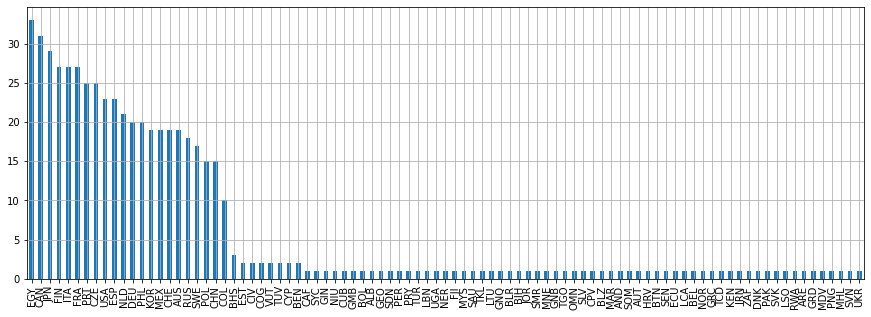

In [10]:
vc=df.Países.value_counts()
vc.plot.bar(figsize=(15,5),grid=True)

In [12]:
# Cardinalidad de 'Países'
n=len(df.Países.unique())
n

91

In [13]:
N_obs=df.shape[0]
N_obs

560

In [14]:
0.2*n


18.2

In [15]:
0.8*N_obs

448.0

In [16]:
cs=vc.cumsum()
cs

EGY     33
CAN     64
JPN     93
FIN    120
ITA    147
      ... 
MDV    556
PNG    557
MHL    558
SVN    559
UKR    560
Name: Países, Length: 91, dtype: int64

<AxesSubplot:>

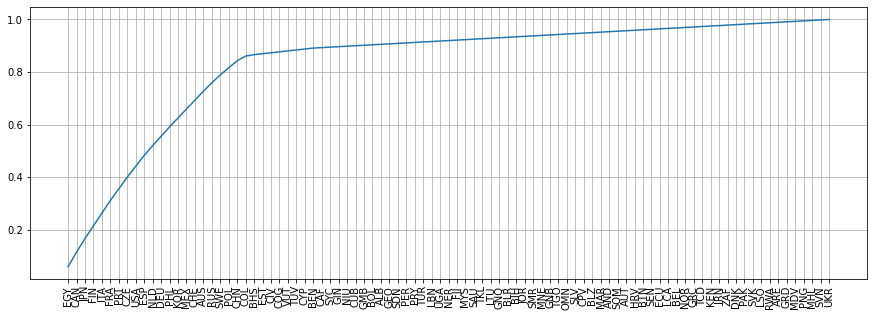

In [17]:
cs=vc.cumsum()
(cs/N_obs).plot(grid=True,figsize=(15,5),xticks=range(n),rot=90)

In [18]:
np.where(cs/N_obs>0.8)[0][0] # índice 19, 20 categorías

19

In [19]:
cs[19]/N_obs # 20 categorías generan el 81.6% de las observaciones

0.8160714285714286

In [20]:
cs[18]/N_obs # 19 categorías generan el 78.9% de las observaciones

0.7892857142857143

# Feature hashing (Hashing trick)


In [21]:
vc

EGY    33
CAN    31
JPN    29
FIN    27
ITA    27
       ..
MDV     1
PNG     1
MHL     1
SVN     1
UKR     1
Name: Países, Length: 91, dtype: int64

In [22]:
n

91

In [23]:
m=20
key={categorias:id for categorias,id in zip(vc.index,range(n))}
key

{'EGY': 0,
 'CAN': 1,
 'JPN': 2,
 'FIN': 3,
 'ITA': 4,
 'FRA': 5,
 'PRT': 6,
 'CZE': 7,
 'USA': 8,
 'ESP': 9,
 'NLD': 10,
 'DEU': 11,
 'PHL': 12,
 'KOR': 13,
 'MEX': 14,
 'CHE': 15,
 'AUS': 16,
 'RUS': 17,
 'SWE': 18,
 'POL': 19,
 'CHN': 20,
 'COL': 21,
 'BHS': 22,
 'EST': 23,
 'CIV': 24,
 'COG': 25,
 'VUT': 26,
 'TUV': 27,
 'CYP': 28,
 'BEN': 29,
 'CAF': 30,
 'SYC': 31,
 'GIN': 32,
 'NIU': 33,
 'CUB': 34,
 'GMB': 35,
 'BOL': 36,
 'ALB': 37,
 'GEO': 38,
 'SDN': 39,
 'PER': 40,
 'PRY': 41,
 'TUR': 42,
 'LBN': 43,
 'UGA': 44,
 'NER': 45,
 'FJI': 46,
 'MYS': 47,
 'SAU': 48,
 'TKL': 49,
 'LTU': 50,
 'GNQ': 51,
 'BLR': 52,
 'BIH': 53,
 'JOR': 54,
 'SMR': 55,
 'MNE': 56,
 'GNB': 57,
 'TGO': 58,
 'OMN': 59,
 'SLV': 60,
 'CPV': 61,
 'BLZ': 62,
 'MAR': 63,
 'AND': 64,
 'SOM': 65,
 'AUT': 66,
 'HRV': 67,
 'BTN': 68,
 'SEN': 69,
 'ECU': 70,
 'LCA': 71,
 'BEL': 72,
 'NOR': 73,
 'GRC': 74,
 'TCD': 75,
 'KEN': 76,
 'IRN': 77,
 'ZAF': 78,
 'DNK': 79,
 'PAK': 80,
 'SVK': 81,
 'LSO': 82,
 'RWA': 83,
 '

In [24]:
[0]*m

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [25]:
df

,Países
0,MEX
1,CHN
2,CAN
3,POL
4,CPV
...,...
555,UKR
556,EGY
557,CHE
558,FRA


In [26]:
# Función Hash tomando en cuenta la frecuencia
cnt=[0]*m
for obs in df.Países:
    i=key[obs]%m
    cnt[i]+=1
cnt

[51,
 44,
 35,
 32,
 32,
 32,
 30,
 30,
 28,
 28,
 25,
 23,
 23,
 22,
 22,
 22,
 22,
 21,
 20,
 18]

In [28]:
hash_cod = {pais:cnt[ID%m] for pais,ID in key.items()}
hash_cod

{'EGY': 51,
 'CAN': 44,
 'JPN': 35,
 'FIN': 32,
 'ITA': 32,
 'FRA': 32,
 'PRT': 30,
 'CZE': 30,
 'USA': 28,
 'ESP': 28,
 'NLD': 25,
 'DEU': 23,
 'PHL': 23,
 'KOR': 22,
 'MEX': 22,
 'CHE': 22,
 'AUS': 22,
 'RUS': 21,
 'SWE': 20,
 'POL': 18,
 'CHN': 51,
 'COL': 44,
 'BHS': 35,
 'EST': 32,
 'CIV': 32,
 'COG': 32,
 'VUT': 30,
 'TUV': 30,
 'CYP': 28,
 'BEN': 28,
 'CAF': 25,
 'SYC': 23,
 'GIN': 23,
 'NIU': 22,
 'CUB': 22,
 'GMB': 22,
 'BOL': 22,
 'ALB': 21,
 'GEO': 20,
 'SDN': 18,
 'PER': 51,
 'PRY': 44,
 'TUR': 35,
 'LBN': 32,
 'UGA': 32,
 'NER': 32,
 'FJI': 30,
 'MYS': 30,
 'SAU': 28,
 'TKL': 28,
 'LTU': 25,
 'GNQ': 23,
 'BLR': 23,
 'BIH': 22,
 'JOR': 22,
 'SMR': 22,
 'MNE': 22,
 'GNB': 21,
 'TGO': 20,
 'OMN': 18,
 'SLV': 51,
 'CPV': 44,
 'BLZ': 35,
 'MAR': 32,
 'AND': 32,
 'SOM': 32,
 'AUT': 30,
 'HRV': 30,
 'BTN': 28,
 'SEN': 28,
 'ECU': 25,
 'LCA': 23,
 'BEL': 23,
 'NOR': 22,
 'GRC': 22,
 'TCD': 22,
 'KEN': 22,
 'IRN': 21,
 'ZAF': 20,
 'DNK': 18,
 'PAK': 51,
 'SVK': 44,
 'LSO': 35,
 'RW

In [29]:
df['hash_1']=df['Países'].map(hash_cod)
df

,Países,hash_1
0,MEX,22
1,CHN,51
2,CAN,44
3,POL,18
4,CPV,44
...,...,...
555,UKR,25
556,EGY,51
557,CHE,22
558,FRA,32


In [30]:
key2={categorias:id for categorias,id in zip(df.Países.unique(),range(n))}
key2

{'MEX': 0,
 'CHN': 1,
 'CAN': 2,
 'POL': 3,
 'CPV': 4,
 'PHL': 5,
 'EGY': 6,
 'FIN': 7,
 'ITA': 8,
 'AUS': 9,
 'CZE': 10,
 'BLZ': 11,
 'FRA': 12,
 'RUS': 13,
 'MAR': 14,
 'ESP': 15,
 'CIV': 16,
 'AND': 17,
 'SOM': 18,
 'CHE': 19,
 'AUT': 20,
 'BHS': 21,
 'JPN': 22,
 'PRT': 23,
 'KOR': 24,
 'COL': 25,
 'USA': 26,
 'NLD': 27,
 'HRV': 28,
 'SWE': 29,
 'DEU': 30,
 'BEN': 31,
 'BTN': 32,
 'SEN': 33,
 'ECU': 34,
 'LCA': 35,
 'BEL': 36,
 'NOR': 37,
 'GRC': 38,
 'TCD': 39,
 'KEN': 40,
 'IRN': 41,
 'CYP': 42,
 'ZAF': 43,
 'DNK': 44,
 'TGO': 45,
 'PAK': 46,
 'SVK': 47,
 'LSO': 48,
 'RWA': 49,
 'ARE': 50,
 'GRD': 51,
 'MDV': 52,
 'PNG': 53,
 'MHL': 54,
 'SVN': 55,
 'SLV': 56,
 'OMN': 57,
 'TUV': 58,
 'GNB': 59,
 'PER': 60,
 'SDN': 61,
 'GEO': 62,
 'ALB': 63,
 'BOL': 64,
 'GMB': 65,
 'CUB': 66,
 'GIN': 67,
 'VUT': 68,
 'COG': 69,
 'SYC': 70,
 'CAF': 71,
 'PRY': 72,
 'LBN': 73,
 'UGA': 74,
 'NER': 75,
 'TUR': 76,
 'MYS': 77,
 'SAU': 78,
 'TKL': 79,
 'EST': 80,
 'LTU': 81,
 'GNQ': 82,
 'BLR': 83,
 '

In [31]:
# Otra función hash
cnt=[0]*m
for obs in df.Países:
    i=key2[obs]%m
    cnt[i]+=1
cnt

[24, 21, 64, 43, 23, 33, 59, 51, 32, 40, 48, 5, 30, 21, 4, 26, 5, 4, 5, 22]

In [32]:
hash_cod2 = {pais:cnt[ID%m] for pais,ID in key2.items()}
hash_cod2


{'MEX': 24,
 'CHN': 21,
 'CAN': 64,
 'POL': 43,
 'CPV': 23,
 'PHL': 33,
 'EGY': 59,
 'FIN': 51,
 'ITA': 32,
 'AUS': 40,
 'CZE': 48,
 'BLZ': 5,
 'FRA': 30,
 'RUS': 21,
 'MAR': 4,
 'ESP': 26,
 'CIV': 5,
 'AND': 4,
 'SOM': 5,
 'CHE': 22,
 'AUT': 24,
 'BHS': 21,
 'JPN': 64,
 'PRT': 43,
 'KOR': 23,
 'COL': 33,
 'USA': 59,
 'NLD': 51,
 'HRV': 32,
 'SWE': 40,
 'DEU': 48,
 'BEN': 5,
 'BTN': 30,
 'SEN': 21,
 'ECU': 4,
 'LCA': 26,
 'BEL': 5,
 'NOR': 4,
 'GRC': 5,
 'TCD': 22,
 'KEN': 24,
 'IRN': 21,
 'CYP': 64,
 'ZAF': 43,
 'DNK': 23,
 'TGO': 33,
 'PAK': 59,
 'SVK': 51,
 'LSO': 32,
 'RWA': 40,
 'ARE': 48,
 'GRD': 5,
 'MDV': 30,
 'PNG': 21,
 'MHL': 4,
 'SVN': 26,
 'SLV': 5,
 'OMN': 4,
 'TUV': 5,
 'GNB': 22,
 'PER': 24,
 'SDN': 21,
 'GEO': 64,
 'ALB': 43,
 'BOL': 23,
 'GMB': 33,
 'CUB': 59,
 'GIN': 51,
 'VUT': 32,
 'COG': 40,
 'SYC': 48,
 'CAF': 5,
 'PRY': 30,
 'LBN': 21,
 'UGA': 4,
 'NER': 26,
 'TUR': 5,
 'MYS': 4,
 'SAU': 5,
 'TKL': 22,
 'EST': 24,
 'LTU': 21,
 'GNQ': 64,
 'BLR': 43,
 'FJI': 23,


In [33]:
df['hash_2']=df['Países'].map(hash_cod2)
df

,Países,hash_1,hash_2
0,MEX,22,24
1,CHN,51,21
2,CAN,44,64
3,POL,18,43
4,CPV,44,23
...,...,...,...
555,UKR,25,48
556,EGY,51,59
557,CHE,22,22
558,FRA,32,30


### Función hash simple (basado en el módulo)

In [ ]:
# Otra función hash
cnt=[0]*m
for obs in df.Países:
    i=key2[obs]%m
    cnt[i]+=1
cnt

In [34]:
def hash_simple(df,col_cat,key,m):
    cnt=[0]*m
    for obs in df[col_cat]:
        i=key[obs]%m
        cnt[i]+=1
    return cnt
    

In [36]:
hash_simple(df, 'Países', key2, 10)

[72, 26, 94, 64, 27, 59, 64, 55, 37, 62]

In [37]:
# Función hash MurmurHash3 de 32 bits
from sklearn.feature_extraction import FeatureHasher

In [38]:
m

20

In [39]:
fcnHash=FeatureHasher(m)
hsh_key = fcnHash.transform([key]).toarray()
hsh_key

array([[ -98.,   94.,   59.,    7.,   69., -207.,  139.,  -44.,   21.,
         -40.,  -38.,  -50.,   29., -251.,  264.,   86.,   19., -208.,
         136.,  272.]])

In [40]:
hsh_key2=fcnHash.transform([key2]).toarray()
hsh_key2

array([[ -79.,   60.,  148.,    5.,   -7., -222.,  178.,  -74.,   40.,
        -103.,  -18.,  -63.,   85., -112.,  262.,   50.,  -50., -174.,
          -5.,  274.]])

In [43]:
hsh_key[0]

array([ -98.,   94.,   59.,    7.,   69., -207.,  139.,  -44.,   21.,
        -40.,  -38.,  -50.,   29., -251.,  264.,   86.,   19., -208.,
        136.,  272.])

In [45]:
d_hsh_key = {pais:hsh_key[0][i%m] for pais,i in zip(df['Países'].unique(), range(n))}
d_hsh_key

{'MEX': -98.0,
 'CHN': 94.0,
 'CAN': 59.0,
 'POL': 7.0,
 'CPV': 69.0,
 'PHL': -207.0,
 'EGY': 139.0,
 'FIN': -44.0,
 'ITA': 21.0,
 'AUS': -40.0,
 'CZE': -38.0,
 'BLZ': -50.0,
 'FRA': 29.0,
 'RUS': -251.0,
 'MAR': 264.0,
 'ESP': 86.0,
 'CIV': 19.0,
 'AND': -208.0,
 'SOM': 136.0,
 'CHE': 272.0,
 'AUT': -98.0,
 'BHS': 94.0,
 'JPN': 59.0,
 'PRT': 7.0,
 'KOR': 69.0,
 'COL': -207.0,
 'USA': 139.0,
 'NLD': -44.0,
 'HRV': 21.0,
 'SWE': -40.0,
 'DEU': -38.0,
 'BEN': -50.0,
 'BTN': 29.0,
 'SEN': -251.0,
 'ECU': 264.0,
 'LCA': 86.0,
 'BEL': 19.0,
 'NOR': -208.0,
 'GRC': 136.0,
 'TCD': 272.0,
 'KEN': -98.0,
 'IRN': 94.0,
 'CYP': 59.0,
 'ZAF': 7.0,
 'DNK': 69.0,
 'TGO': -207.0,
 'PAK': 139.0,
 'SVK': -44.0,
 'LSO': 21.0,
 'RWA': -40.0,
 'ARE': -38.0,
 'GRD': -50.0,
 'MDV': 29.0,
 'PNG': -251.0,
 'MHL': 264.0,
 'SVN': 86.0,
 'SLV': 19.0,
 'OMN': -208.0,
 'TUV': 136.0,
 'GNB': 272.0,
 'PER': -98.0,
 'SDN': 94.0,
 'GEO': 59.0,
 'ALB': 7.0,
 'BOL': 69.0,
 'GMB': -207.0,
 'CUB': 139.0,
 'GIN': -44.0,
 '

In [47]:
df['MurmurHash_key'] = df['Países'].map(d_hsh_key)

In [48]:
df

,Países,hash_1,hash_2,MurmurHash_key
0,MEX,22,24,-98.0
1,CHN,51,21,94.0
2,CAN,44,64,59.0
3,POL,18,43,7.0
4,CPV,44,23,69.0
...,...,...,...,...
555,UKR,25,48,-38.0
556,EGY,51,59,139.0
557,CHE,22,22,272.0
558,FRA,32,30,29.0


In [50]:
d_hsh_key2 = {pais:hsh_key2[0][i%m] for pais,i in zip(df['Países'].unique(), range(n))}
d_hsh_key2

{'MEX': -79.0,
 'CHN': 60.0,
 'CAN': 148.0,
 'POL': 5.0,
 'CPV': -7.0,
 'PHL': -222.0,
 'EGY': 178.0,
 'FIN': -74.0,
 'ITA': 40.0,
 'AUS': -103.0,
 'CZE': -18.0,
 'BLZ': -63.0,
 'FRA': 85.0,
 'RUS': -112.0,
 'MAR': 262.0,
 'ESP': 50.0,
 'CIV': -50.0,
 'AND': -174.0,
 'SOM': -5.0,
 'CHE': 274.0,
 'AUT': -79.0,
 'BHS': 60.0,
 'JPN': 148.0,
 'PRT': 5.0,
 'KOR': -7.0,
 'COL': -222.0,
 'USA': 178.0,
 'NLD': -74.0,
 'HRV': 40.0,
 'SWE': -103.0,
 'DEU': -18.0,
 'BEN': -63.0,
 'BTN': 85.0,
 'SEN': -112.0,
 'ECU': 262.0,
 'LCA': 50.0,
 'BEL': -50.0,
 'NOR': -174.0,
 'GRC': -5.0,
 'TCD': 274.0,
 'KEN': -79.0,
 'IRN': 60.0,
 'CYP': 148.0,
 'ZAF': 5.0,
 'DNK': -7.0,
 'TGO': -222.0,
 'PAK': 178.0,
 'SVK': -74.0,
 'LSO': 40.0,
 'RWA': -103.0,
 'ARE': -18.0,
 'GRD': -63.0,
 'MDV': 85.0,
 'PNG': -112.0,
 'MHL': 262.0,
 'SVN': 50.0,
 'SLV': -50.0,
 'OMN': -174.0,
 'TUV': -5.0,
 'GNB': 274.0,
 'PER': -79.0,
 'SDN': 60.0,
 'GEO': 148.0,
 'ALB': 5.0,
 'BOL': -7.0,
 'GMB': -222.0,
 'CUB': 178.0,
 'GIN': -7

In [51]:
df['MurmurHash_key2'] = df['Países'].map(d_hsh_key2)

In [52]:
df

,Países,hash_1,hash_2,MurmurHash_key,MurmurHash_key2
0,MEX,22,24,-98.0,-79.0
1,CHN,51,21,94.0,60.0
2,CAN,44,64,59.0,148.0
3,POL,18,43,7.0,5.0
4,CPV,44,23,69.0,-7.0
...,...,...,...,...,...
555,UKR,25,48,-38.0,-18.0
556,EGY,51,59,139.0,178.0
557,CHE,22,22,272.0,274.0
558,FRA,32,30,29.0,85.0


In [ ]:
len(hsh_key[0])

In [ ]:
!pip install category-encoders

In [53]:
from category_encoders import HashingEncoder

In [54]:
fcnHash_OH=HashingEncoder(n_components=m,cols='Países')
fcnHash_OH.fit_transform(df)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_14,col_15,col_16,col_17,col_18,col_19,hash_1,hash_2,MurmurHash_key,MurmurHash_key2
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,22,24,-98.0,-79.0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,51,21,94.0,60.0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,44,64,59.0,148.0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,18,43,7.0,5.0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,44,23,69.0,-7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,25,48,-38.0,-18.0
556,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,51,59,139.0,178.0
557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,22,22,272.0,274.0
558,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,32,30,29.0,85.0
